In [12]:
title = 'Attention forward (D=64, causal)'

X_label = 'Sequence length'
Y_label = 'TFLOPs'
Y1_label = 'TK'
Y2_label = 'FA2/PyTorch'

X = ['1024', '2048', '4096', '8192', '16384']
Y1 = [250, 297, 315, 330, 336]
Y2 = [121, 180, 231, 242, 251]

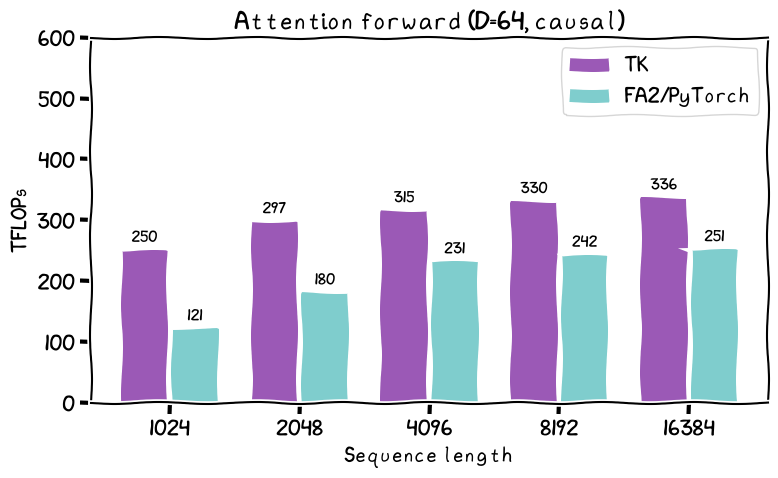

In [13]:
import matplotlib.pyplot as plt
import numpy as np

x_range = np.arange(len(X))
width = 0.35
with plt.xkcd():
    fig, ax = plt.subplots(figsize=(8, 5))

    bars1 = ax.bar(x_range - width/2 - 0.02, Y1, width, label=Y1_label, color='#9b59b6')
    bars2 = ax.bar(x_range + width/2 + 0.02, Y2, width, label=Y2_label, color='#7fcdcd')

    ax.set_ylabel(Y_label)
    ax.set_xlabel(X_label)
    ax.set_title(title)
    ax.set_xticks(x_range)
    ax.set_xticklabels(X)
    ax.set_ylim(0, 600)
    ax.legend()

    for bar in bars1 + bars2:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 10,
                f'{int(height)}', ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()